1. bifurication diagram

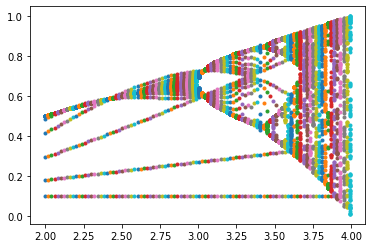

In [1]:
import matplotlib.pyplot as plt
import numpy as np

for x0 in (np.array(range(0,1))*.0000000001+.1):

  for R in np.linspace(2,3.99,100):
    x = [x0]
    Rplot= [R]
    for i in range(0,100):
        x.append(R*x[-1]*(1-x[-1]))
        Rplot.append(R)

    plt.plot(Rplot,x,'.')
    #plt.plot(x[-50:-1])
    #plt.ylim([0, 0.9])

plt.show()

2. Stable solutions seem to converge to a point and stay there the chaotic ones seem too never reach a stable point

1. All three fixed points of the lorenz system are unstable we can see this through Jacobian evaluation and looking at the eigenvalues

In [4]:
import numpy as np

a = 28
b = 10
c = 8/3

def Jacobian(xvec):
  x = xvec[0]
  y = xvec[1]
  z = xvec[2]
  return np.array((
      (-b,b,0),
      (a-z,-1,-x),
      (y,x,-c)
      ))

Trivial Solution has positive eigenvalue so unstable

In [5]:
xvec = np.array((0,0,0))
J = Jacobian(xvec)
print(np.linalg.eigvals(J))

[-22.82772345  11.82772345  -2.66666667]


2nd solution has positive real values in the complex conjugate eigen values so unstable

In [7]:
x0 = np.sqrt(c*(a-1))
y0 = x0
z0 = a-1

xvec = np.array((x0,y0,z0))
J = Jacobian(xvec)
print(np.linalg.eigvals(J))

[-13.85457791 +0.j           0.09395562+10.19450522j
   0.09395562-10.19450522j]


In [8]:
x0 = -np.sqrt(c*(a-1))
y0 = x0
z0 = a-1

xvec = np.array((x0,y0,z0))
J = Jacobian(xvec)
print(np.linalg.eigvals(J))

[-13.85457791 +0.j           0.09395562+10.19450522j
   0.09395562-10.19450522j]


2. Centers of butterfly wings located at (6 sqrt(2),6 sqrt(2),27) and (-6 sqrt(2),-6 sqrt(2),27) 

In [12]:
print(-x0,-x0,z0)

print(x0,x0,z0)

8.48528137423857 8.48528137423857 27
-8.48528137423857 -8.48528137423857 27


1. Repeat the above for the Lorenz system with a variety of initial conditions, and perturbations
along the x, y, and z directions. What average Liapunov exponent do you measure for the
system? How does this compare to the theoretical maximum Liapunov exponent for this system
of about 0.9?
2. Repeat the above plot for two solutions of the simple harmonic oscillator. What is the
characteristic difference in the behavior of a periodic system and an aperiod system when
measured in this way?

Not radically growing the same way as the Lorenz system
3. Repeat the same for the damped SHO.
4. Repeat the same for the exponential growth equation.

continious 

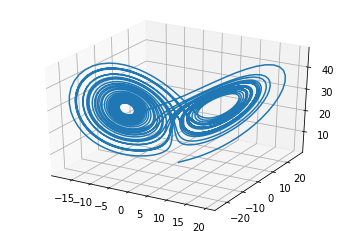

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.show()

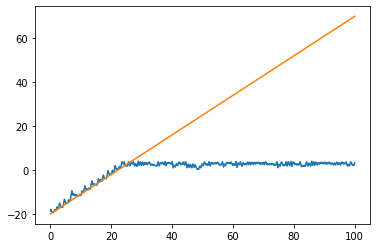

In [24]:
from scipy.integrate import odeint

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def fEq(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z 

#Pick points that are not equilibruim point
xvec = np.array([8,8,8])
delta0 = 1.0e-8

xvec2 = xvec + (3**(1/3))/3*delta0*np.array([1,1,1])
tspan = np.linspace(0,100,10000)

solution = odeint(fEq,xvec,tspan,rtol=1.0e-13,atol=1.0e-12)
solution2 = odeint(fEq,xvec2,tspan,rtol=1.0e-13,atol=1.0e-12)

delta1a = solution2-solution
delta1 = []

for i in range(0,len(delta1a)):
  delta1.append(np.sqrt(np.sum(delta1a[i]*delta1a[i])))
delta1 = np.array(delta1)

lam = 0.9
plt.plot(tspan,np.log(delta1))
plt.plot(tspan,tspan*lam-20)
plt.show()

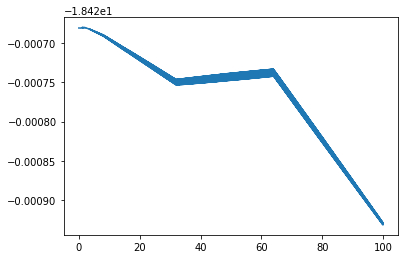

In [30]:


from scipy.integrate import odeint

def SHO(yvec,t):
  x = yvec[0]
  v = yvec[1]
  return np.array((v,-x))

#Pick points that are not equilibruim point
xvec = np.array([1,0])
delta0 = 1.0e-8

xvec2 = xvec + (2**(1/2))/2*delta0*np.array([1,1])
tspan = np.linspace(0,100,10000)

solution = odeint(SHO,xvec,tspan,rtol=1.0e-13,atol=1.0e-12)
solution2 = odeint(SHO,xvec2,tspan,rtol=1.0e-13,atol=1.0e-12)

delta1a = solution2-solution
delta1 = []

for i in range(0,len(delta1a)):
  delta1.append(np.sqrt(np.sum(delta1a[i]*delta1a[i])))
delta1 = np.array(delta1)

lam = 0.01
plt.plot(tspan,np.log(delta1))
#plt.plot(tspan,tspan*lam-18)
plt.show()

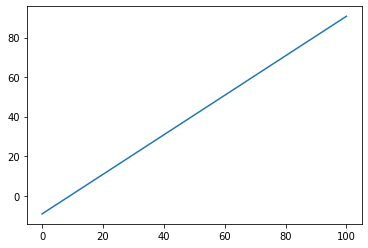

In [31]:


from scipy.integrate import odeint

def ExpGrowth(yvec,t):
  x = yvec[0]
  return np.array(x)

#Pick points that are not equilibruim point
xvec = np.array([0.1])
delta0 = 1.0e-4

xvec2 = xvec + delta0*np.array([1])
tspan = np.linspace(0,100,10000)

solution = odeint(ExpGrowth,xvec,tspan,rtol=1.0e-13,atol=1.0e-12)
solution2 = odeint(ExpGrowth,xvec2,tspan,rtol=1.0e-13,atol=1.0e-12)

delta1a = solution2-solution
delta1 = []

for i in range(0,len(delta1a)):
  delta1.append(np.sqrt(np.sum(delta1a[i]*delta1a[i])))
delta1 = np.array(delta1)

lam = 0.01
plt.plot(tspan,np.log(delta1))
#plt.plot(tspan,tspan*lam-18)
plt.show()